## __Introduction to Modeling with Python__


### __*Analysis of data*__

With this assignment I wasn't very sure where to start but after looking over at some examples, I found some help. I decided to follow the same pattern: 
1. Understand the problem. 
2. Analyze the data (finding the most significant variables that would help our predicting models. 
3. Clean the data. 
4. Apply predictive models.

Loaded in all the packages that I would need.

In [1]:
# import analysis tools and visuals
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# read in each dataset
test=pd.read_csv("/Users/rmunix/Documents/School/Econ 213R/HW#2/test.csv")

In [3]:

# read in each dataset
train=pd.read_csv("/Users/rmunix/Documents/School/Econ 213R/HW#2/train.csv")

In [4]:
# read in each dataset
sample=pd.read_csv("/Users/rmunix/Documents/School/Econ 213R/HW#2/sample_submission.csv")
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


I recognized that I first needed to understand the data and see what I had to work with. I ran some simple statistics and visuals to get a good idea of what I had. I found that the data listed different characteristics of a house and I immediately found that alot of the data was missing. Before starting any data cleaning I first wanted to find variables that were important for my model. This way I avoided cleaning anything that I was not going to use. 

In [5]:
test.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
5     1466          60       RL         75.0    10000   Pave   NaN      IR1   
6     1467          20       RL          NaN     7980   Pave   NaN      IR1   
7     1468          60       RL         63.0     8402   Pave   NaN      IR1   
8     1469          20       RL         85.0    10176   Pave   NaN      Reg   
9     1470          20       RL         70.0     8400   Pave   NaN      Reg   
10    1471         120       RH         26.0     5858   Pave   NaN      IR1   
11    1472         160

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


I ran a simple boxplot on the target variable, "SalePrice" to visually see the average sale price and to see how the data was distributed. Looks like it's very right skewed. I ran the skewness and kurtosis to see exactly how far it went. 

Text(0.5, 1.0, 'Sale Price Distribution')

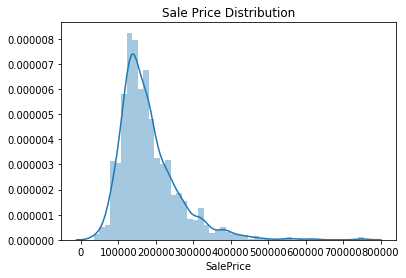

In [7]:
sns.distplot(train['SalePrice']);
plt.title('Sale Price Distribution')

In [8]:
print("Skewness: %f" % sample['SalePrice'].skew())
print("Kurtosis: %f" % sample['SalePrice'].kurt())

Skewness: 0.929360
Kurtosis: 3.794722


To get a more numerical sense of SalePrice I ran a summary. Im just continuing to gather data here to see if I find anything interesting that can give me a good sense of what should be affecting our target variable.

In [9]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

I was curious to see how many numerical variables we had and how many categorical variables we would have to changed. I found that there were quite a few and hopefully when we find our key influencing variables there wont be that many to adjust.

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### __*Visualization*__

Alright here I wanted to start finding the key influencers that would be affecting our target variable "SalePrice," I searched around and found a really cool kernal that showed how to use a heat map to help you see visually what should be the key influencers. On the right of this heat map you will see a scale that indicates the color representing the corrolation between two different variables. If you look closely you will see that the y-axis and the x-axis have in similar order all the variables that came in our data set. If you go to the bottom left corner of this heatmap you will find our target variable and moving from left to right right you also see all the other variables. I figured anything with the correlation of 0.50 and above would be a good place to start. These would be those in the orange to peach color (correlation value x>0.50).

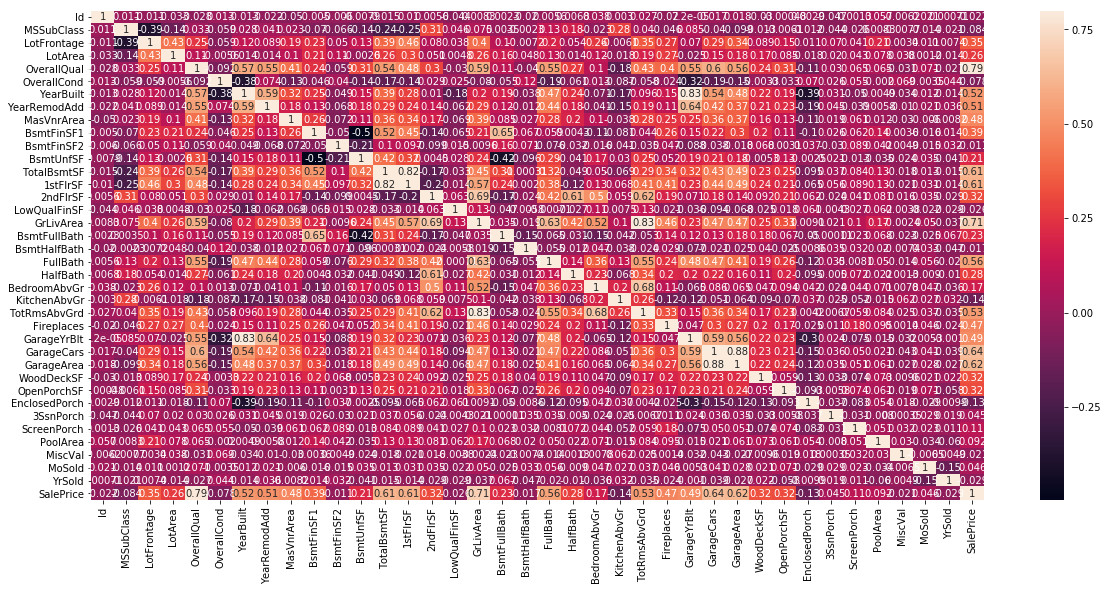

In [11]:
#correlation heatmap
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

I could have just hand picked visually from our first heatmap which variables that were above the correlation value of 0.50 but I wanted to have python do that for me so I didn't commit any errors. Looking at the x-axis or y-axis you will see what python found as our key influencers of SalePrice.

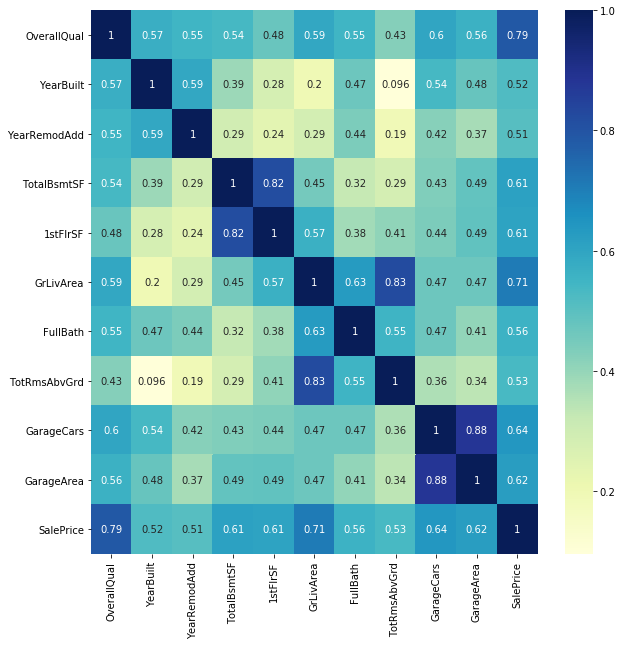

In [12]:
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="YlGnBu")

I wanted to see vizually if we were on the right track with our most correlated variable. I expected so see a very postive correlation and found that to be true!

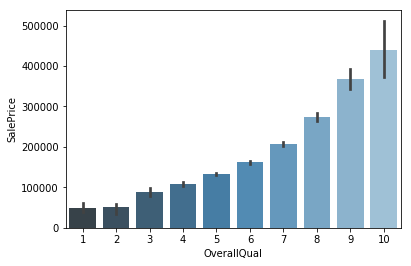

In [13]:
sns.barplot(train.OverallQual,train.SalePrice, palette="Blues_d")

I wanted to be able to do a quick check visually with all the variables that python found. If you look at the top chartes on the SalePrice row you will see all the distributions of each variable listed and their correlation distributions with SalePrice. You will also see on the diagonal the distribution of each individual variable. The confusing parts of this chart may be all the other charts listed that display all the other individual correlation distributions among the other variables.

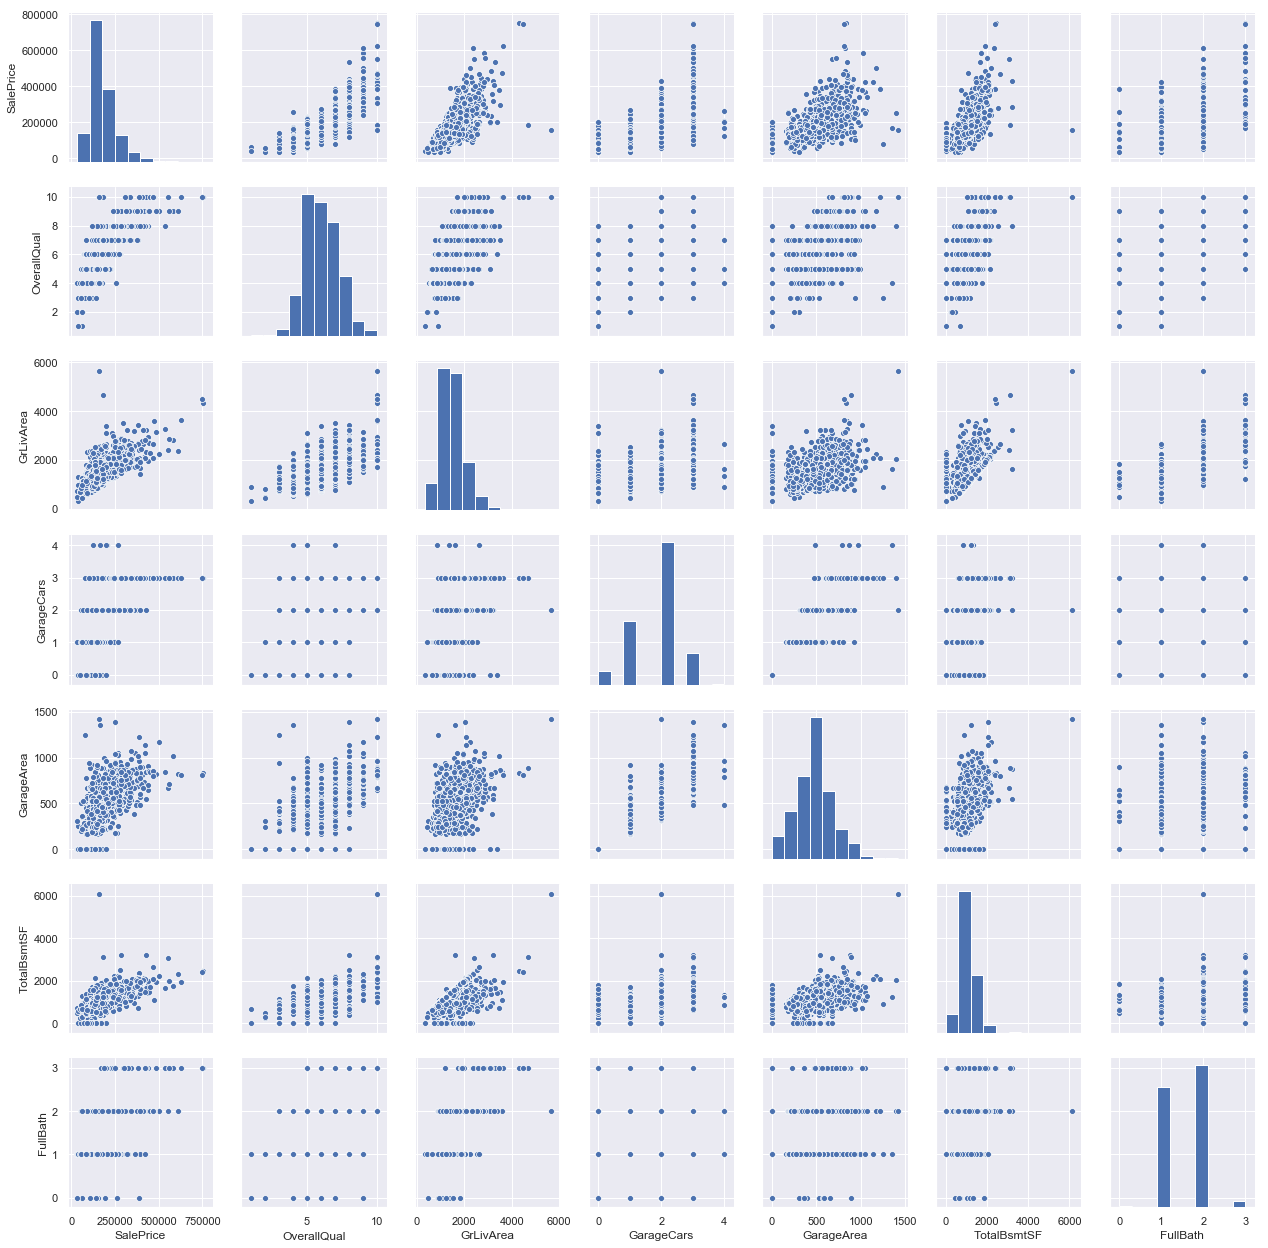

In [14]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'FullBath']
sns.pairplot(train[cols], size = 2.5)
plt.show();

The visuals were great but I wanted a quick and easy way to reference numerically which variables were the most correalted with SalePrice. The list generated displays from most to least which varaibles are most correlated with SalePrice.

In [15]:
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

### __*Cleaning the Data*__

Like mentioned above I noticed that there is a lot of missing data in our test and train data set. Exactly how much I'm dealing with and where Im missing it I wasn't really sure. So I poked around to see if I could find any help with this. I found a couple functions that could look through all my variables, list all the missing variables and display them all in a neat list for everyone to observe.

Previously I made a list that would help me see what variables were categorical and which were numerical. I wanted to put them all in a bins so I could apply specific changes that would work for categorical variables and numerical variables. Doing this will make it easier for me to deal with the missing data.

In [16]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include=['object']).columns
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [17]:
numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [18]:
# Grab all the data with the headers of each numerical and categorical variable
train_num = train[numerical_features]
train_cat = train[categorical_features]
train_cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [19]:
# Handle remaining missing values for numerical variables by using median as replacement
train_num.isnull().values.sum()
train_num = train_num.fillna(train_num.median())
train_num.isnull().values.sum()


0

In [20]:
# Handle missing data for categorical variables with a dummy variable
train_catd= pd.get_dummies(train_cat)
train_catd.head()
train_catd

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
5,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
8,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
9,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [21]:
#combine datasets train_num and train_catd
train_data= pd.concat([train_num,train_catd])
train_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley_Grvl,Alley_Pave,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,...,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856.0,854.0,0.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,8.0,856.0,NaN,NaN,0.0,2003.0,2003.0,2008.0
1,1262.0,0.0,0.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,6.0,1262.0,NaN,NaN,298.0,1976.0,1976.0,2007.0
2,920.0,866.0,0.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,6.0,920.0,NaN,NaN,0.0,2001.0,2002.0,2008.0
3,961.0,756.0,0.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,756.0,NaN,NaN,0.0,1915.0,1970.0,2006.0
4,1145.0,1053.0,0.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,9.0,1145.0,NaN,NaN,192.0,2000.0,2000.0,2008.0


### __*The Model (Linear Regression)*__

Now with my data all cleaned up and missing data accounted for I was ready to start modeling. I tried linear regression first to see how close I could get to the benchmark. If I wasnt very close I figured I would be able to do some tweaks here an there and try again until I got closer.

In [22]:
# import model tools

from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.linear_model import SGDRegressor
from sklearn.impute import SimpleImputer

In [24]:
# divide data into predictor and target variables
train_X = train.drop('SalePrice', axis=1)
train_y = train.SalePrice
test_X = test

# one-hot encoding categorical variables for analysis
onehot_train_X = pd.get_dummies(train_X)
onehot_test_X = pd.get_dummies(test_X)
train_X, test_X = onehot_train_X.align(onehot_test_X, join='left', axis=1)

# impute missing values with the column's mean value
my_imputer = SimpleImputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

# use cross-validation and print the scores for each
reg = LinearRegression()
cv_scores = cross_val_score(reg, train_X, train_y, cv=5)
print(cv_scores)

# define the model
reg = LinearRegression()
reg.fit(train_X, train_y)
predictions = reg.predict(test_X)

# creating the submission file
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice':predictions})
my_submission.to_csv('submission4.csv', index=False)

[0.82273403 0.82015775 0.79383245 0.88785895 0.64306096]


### __*The Model (Gradient Decent)*__

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
# divide data into predictor and target variables
train_X = train.drop('SalePrice', axis=1)
train_y = train.SalePrice
test_X = test

# one-hot encoding categorical variables for analysis
onehot_train_X = pd.get_dummies(train_X)
onehot_test_X = pd.get_dummies(test_X)
train_X, test_X = onehot_train_X.align(onehot_test_X, join='left', axis=1)

# impute missing values with the column's mean value
my_imputer = SimpleImputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

#GardientBoosting
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.1, 'loss': 'ls'}
gbr_model = GradientBoostingRegressor(**params)
gbr_model.fit(train_X, train_y)

gbr_model.score(train_X, train_y)

#Predicting the SalePrice for the test data
y_grad_predict = gbr_model.predict(test_X)
print(y_grad_predict)

#Submission 
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': y_grad_predict})
print(my_submission)

my_submission.to_csv('submissiongdv.csv', encoding='utf-8', index=False)


[124591.10626124 163999.83012181 187169.73461667 ... 163231.14515757
 111161.48029117 214633.943134  ]
        Id      SalePrice
0     1461  124591.106261
1     1462  163999.830122
2     1463  187169.734617
3     1464  194448.696093
4     1465  192578.392312
5     1466  176555.959488
6     1467  168671.814812
7     1468  169344.096461
8     1469  188446.618888
9     1470  126277.587463
10    1471  193978.872396
11    1472   93216.357464
12    1473   93382.533238
13    1474  160119.422632
14    1475  133999.907938
15    1476  407692.200420
16    1477  262945.808076
17    1478  313325.725939
18    1479  278923.700321
19    1480  491159.494553
20    1481  330577.848959
21    1482  220472.962133
22    1483  166816.481902
23    1484  168719.328376
24    1485  175413.843488
25    1486  193529.747058
26    1487  387677.872358
27    1488  245727.026096
28    1489  213518.095884
29    1490  213209.033277
...    ...            ...
1429  2890   88328.911226
1430  2891  135104.286599
1431  2892   